In [50]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

<Axes: >

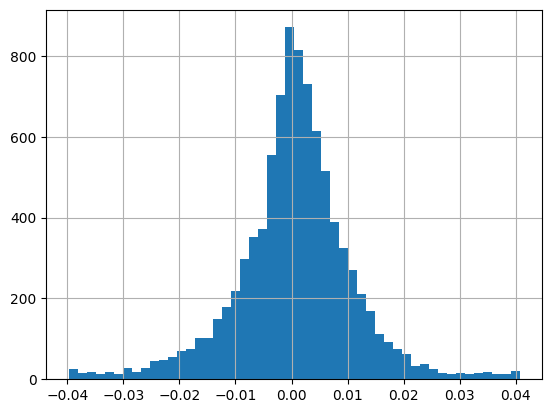

In [12]:
train_df['forward_returns'].hist(bins=50)

#### customized features/targets (C)
C1: within 3 std (0); larger than mean+3std (+1); smaller than mean-3std (-1)

In [106]:
mean = train_df['forward_returns'].mean()
std = train_df['forward_returns'].std()

train_df['C1'] = np.where(
    train_df['forward_returns'] > mean + 3*std,  1,
    np.where(train_df['forward_returns'] < mean - 3*std, -1, 0)
)

In [107]:
train_df['C1'].value_counts()

C1
 0    8810
-1      94
 1      86
Name: count, dtype: int64

## Train a categorization model that is able to predict C1

#### Simple decision tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [92]:
features = [col for col in train_df.columns if col[0] in ['D','E','I','M','P','S','V']]
target = 'C1'

X = train_df[features]
y = train_df[target]


In [103]:
print(train_df.columns)

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
X_train

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,...,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9
131,0,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6154,0,0,0,0,0,0,0,0,1,2.242179,...,0.311177,-0.777057,0.503968,0.566138,0.431217,0.183033,0.279762,-0.990418,0.371362,-1.119499
7582,0,0,0,1,0,0,0,0,1,2.486636,...,0.789021,0.161614,0.868386,0.802910,0.751984,-0.064691,0.158730,0.046713,0.724537,-0.198022
5956,0,0,0,0,0,0,0,0,0,1.023315,...,0.991402,-0.633219,0.748016,0.688492,0.767196,-0.197757,0.983466,-0.875847,0.231151,-1.021652
4260,0,0,0,1,0,-1,0,0,0,1.397966,...,0.000661,-0.982743,0.832011,0.843254,0.864418,0.414720,0.312169,-1.336080,0.000661,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,0,0,0,0,0,0,0,0,0,1.433116,...,0.074735,0.284722,0.117063,0.054894,0.014550,-1.274212,0.796296,0.538207,0.504630,0.591844
7515,1,1,0,1,0,0,0,1,0,2.159977,...,0.050265,-0.280532,0.400794,0.162037,0.661376,-0.484524,0.098545,-0.440517,0.436508,-0.195144
3523,0,0,0,1,0,0,0,0,0,0.882571,...,0.000661,-0.945861,0.603836,0.118386,0.388228,2.493345,0.000661,-1.569268,0.000661,NaN
5281,1,1,1,1,0,0,0,0,0,2.370218,...,0.658730,-0.232818,0.183201,0.273148,0.214286,0.805244,0.987434,-0.349379,0.658730,-0.181941


In [39]:
clf = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    max_depth=None,      # limit tree depth to prevent overfitting
    random_state=42
)

clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9655172413793104

Classification Report:
               precision    recall  f1-score   support

          -1       0.15      0.21      0.18        19
           0       0.99      0.98      0.98      1762
           1       0.06      0.06      0.06        17

    accuracy                           0.97      1798
   macro avg       0.40      0.42      0.41      1798
weighted avg       0.97      0.97      0.97      1798


Confusion Matrix:
 [[   4   14    1]
 [  17 1731   14]
 [   5   11    1]]


#### Add feature selections and other stuffs

In [51]:
import seaborn as sns

In [59]:
train_df_tail_extreme = train_df[train_df['C1'] != 0]
train_df_tail_extreme['C1'].value_counts()

C1
-1    94
 1    86
Name: count, dtype: int64

In [80]:
corr_matrix = train_df_tail_extreme[features + [target]].corr(method="spearman")
top_features = corr_matrix[target].where(lambda x: abs(x) >= 0.1).dropna().\
    sort_values(ascending=False, key=lambda x: abs(x))[1:11].index.tolist()

top_features

['V10', 'M1', 'V9', 'S3', 'M2', 'P10', 'S8', 'V7', 'S2', 'P11']

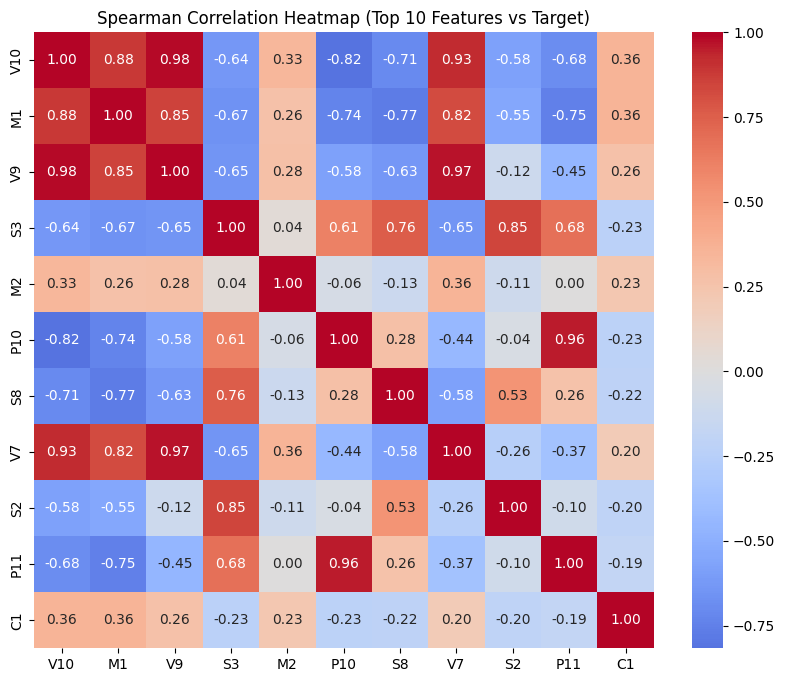

In [86]:
corr_matrix_top_features = train_df_tail_extreme[top_features + [target]].corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top_features, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Spearman Correlation Heatmap (Top 10 Features vs Target)")
plt.show()

In [ ]:
features = top_features
target = 'C1'

X = train_df[features]
y = train_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    max_depth=None,      # limit tree depth to prevent overfitting
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9632925472747497

Classification Report:
               precision    recall  f1-score   support

          -1       0.04      0.05      0.05        19
           0       0.98      0.98      0.98      1762
           1       0.00      0.00      0.00        17

    accuracy                           0.96      1798
   macro avg       0.34      0.35      0.34      1798
weighted avg       0.96      0.96      0.96      1798


Confusion Matrix:
 [[   1   16    2]
 [  20 1731   11]
 [   2   15    0]]


In [91]:
features = [col for col in train_df.columns if col[0] in ['M']]
target = 'C1'

X = train_df[features]
y = train_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(
    criterion='gini',    # or 'entropy'
    max_depth=None,      # limit tree depth to prevent overfitting
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9616240266963293

Classification Report:
               precision    recall  f1-score   support

          -1       0.04      0.05      0.04        19
           0       0.98      0.98      0.98      1762
           1       0.06      0.06      0.06        17

    accuracy                           0.96      1798
   macro avg       0.36      0.36      0.36      1798
weighted avg       0.97      0.96      0.96      1798


Confusion Matrix:
 [[   1   17    1]
 [  20 1727   15]
 [   5   11    1]]


#### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [110]:
features = [col for col in train_df.columns if col[0] in ['D','E','I','M','P','S','V']]
X = train_df[features]        # your selected features
y = train_df['C1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # limit depth if you want to reduce overfitting
    class_weight='balanced',# handle class imbalance
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [111]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9794215795328143

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        19
           0       0.98      1.00      0.99      1762
           1       0.00      0.00      0.00        17

    accuracy                           0.98      1798
   macro avg       0.33      0.33      0.33      1798
weighted avg       0.96      0.98      0.97      1798


Confusion Matrix:
 [[   0   18    1]
 [   1 1761    0]
 [   1   16    0]]
